## Data Analysis Project (rename to the title of our project)

DSCI 100, Section 9，Group 38   
Anson Chen, Amber O'Neile, Nathania So, Xiaoran Sun

### Introduction

The data being analyzed in this project was collected from a Minecraft server run by a group of Computer Science students at UBC. The group collected both demographic and behavioural data about the players for the purposes of training artificial intelligence.

In this project, we seek to answer the question: **Can player age and gameplay time be used to predict if players will subscribe to the CS group's game-related newsletter?**

The players dataset contains demographical information about 196 Minecraft players in 196 observations and 7 variables. This information was collected through a form for participants in a study by Frank Wood<sup>[1]</sup>. The variables in this dataset, and summary statistics regarding them when applicable, are listed below.

| Variable     | Type      | Meaning                                                   | Mean  | Median |
| ------------ | --------- | --------------------------------------------------------- | ----- | ------ |
| experience   | factor    | Experience level of the player                            | NA    | NA     |
| subscribe    | logical   | Whether the player is subscribed to the newsletter or not | NA    | NA     |
| hashedEmail  | character | Encoded email addresses of players to maintain privacy    | NA    | NA     |
| played-hours | double    | Total hours of Minecraft played                           | 5.85  | 0.1    |
| name         | character | Name of players                                           | NA    | NA     |
| gender       | factor    | Gender of the player                                      | NA    | NA     | 
| age          | integer   | Age of the player in years                                | 21.14 | 19     |

### Analysis and Visualization

In [20]:
# Installing necessary libraries.
library(tidyverse)
library(tidymodels)

### Methods and Results

To investigate which player characteristics are predictive of subscribing to game-related newsletters, we selected age and total play hours as our key variables. Our analysis follows a complete data-science workflow, from cleaning the data to preparing it for modeling. Below, we describe the steps we used to process and wrangle the data before analysis. We will use a K-Nearest Neighbours (KNN) classification model to predict whether a player subscribes to the newsletter. Our response variable (y) is the subscription status, and our predictors (x) are age and played hours.
KNN is chosen because the outcome is categorical and the relationship between age, play hours, and subscription is unlikely to be perfectly linear. Unlike linear regression, which requires a continuous outcome and strong assumptions about linearity, KNN is a flexible non-parametric method that can capture more complex patterns. Since KNN relies on distance calculations, we will standardize age and average hours played so that both variables contribute equally to the model.

1.  We begin by importing the players.csv into R.
The players dataset provides demographic information such as player age. The file is loaded using read_csv( ).

In [12]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [13]:
#probably not needed?
combined_data <- inner_join(sessions, players)
combined_data

ERROR: Error in eval(expr, envir, enclos): object 'sessions' not found


2. Wrangle and Clean Data:   
Next, we cleaned the merged dataset by removing rows where essential information such as age, play sessions was missing or unusable.

In [18]:
# cleaned_data <- combined_data |>
cleaned_data <- players |>
  filter(!is.na(Age),
         !is.na(played_hours))

Select relevant data only

In [20]:
cleaned_data <- cleaned_data |> select(Age, played_hours, subscribe)

Then we convert "subscribe" from logical to factor form.

In [21]:
cleaned_data <- cleaned_data|> mutate(subscribe = as_factor(subscribe))

3. Split the Data: 
   Split the data set into 75% for training and reserving 25% for testing, then apply 5-fold cross-validation to the training set

In [27]:
data_split <- initial_split(cleaned_data, prop = 0.75, strata = subscribe)  
data_train <- training(data_split)   
data_test <- testing(data_split)

fold <- vfold_cv(data_train, v=5, strata = subscribe)


4. Determining the best number of neighbours

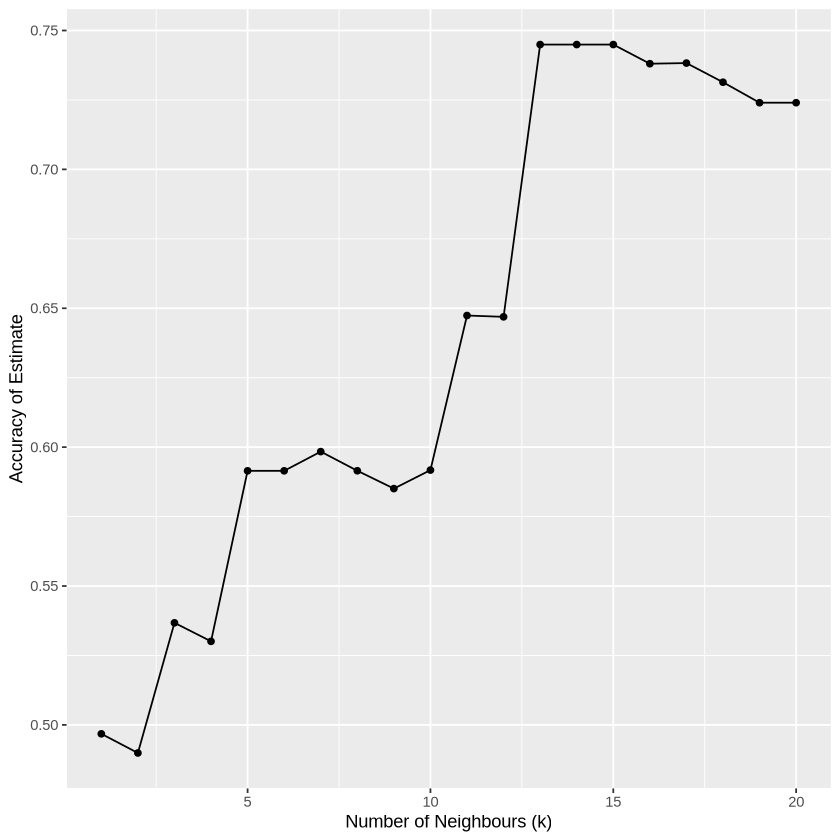

In [31]:
knn_recipe <- recipe(subscribe ~ Age + played_hours, data = data_train) |>
            step_center(all_predictors()) |>
            step_scale(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

results <- workflow() |>
      add_recipe(knn_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = fold, grid = k_vals) |>
      collect_metrics()

accuracies <- results |>
            filter(.metric == "accuracy")

cross_val_plot <- accuracies |>
                ggplot(aes(x=neighbors, y=mean)) +
                geom_point() + geom_line() +
                labs(x = "Number of Neighbours (k)", y= "Accuracy of Estimate")
cross_val_plot

Chosen number of neighbours is 13, 14, or 15 because that provides the highest accuracy. We will use 13.

5. Make a new specification based on the best number of neighbours found in step 4

In [32]:
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors=13) |>
            set_engine("kknn") |>
            set_mode("classification")

6. Put it all together in a workflow and fit the model to the training data

In [33]:
knn_fit <- workflow() |>
          add_recipe(knn_recipe) |>
          add_model(knn_spec) |>
          fit(data = data_train)

7. Fit the model to the test data and then run a few metrics to see the performance of the model

In [45]:
subscription_predictions <- predict(knn_fit, data_test) |>
                    bind_cols(data_test)

subscription_accuracy <- subscription_predictions |>
                metrics(truth = subscribe, estimate = .pred_class) |>
                filter(.metric == "accuracy")
subscription_precision <- subscription_predictions |>
                precision(truth = subscribe, estimate = .pred_class)
subscription_recall <- subscription_predictions |>
                recall(truth = subscribe, estimate = .pred_class)
subscription_conf_mat <- subscription_predictions |>
                conf_mat(truth = subscribe, estimate = .pred_class)
subscription_accuracy
subscription_precision
subscription_recall
subscription_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.4444444


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3076923


          Truth
Prediction FALSE TRUE
     FALSE     4    5
     TRUE      9   31

### Discussion

### References